In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras import backend as K

In [3]:
cnt = pd.read_csv("carbon_nanotubes.csv")
cnt.head()

,Chiral indice n,Chiral indice m,Initial atomic coordinate u,Initial atomic coordinate v,Initial atomic coordinate w,Calculated atomic coordinates u',Calculated atomic coordinates v',Calculated atomic coordinates w'
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


In [4]:
cnt.columns

Index(['Chiral indice n', 'Chiral indice m', 'Initial atomic coordinate u',
       'Initial atomic coordinate v', 'Initial atomic coordinate w',
       'Calculated atomic coordinates u'', 'Calculated atomic coordinates v'',
       'Calculated atomic coordinates w''],
      dtype='object')

In [5]:
cnt.columns=['chiral_index_n', 'chiral_index_m', 'initial_coord_u', 'initial_coord_v', 'initial_coord_w', 'calc_coord_u', 'calc_coord_v', 'calc_coord_w']
cnt_nn = cnt[['chiral_index_n', 'chiral_index_m','initial_coord_u', 'initial_coord_v', 'initial_coord_w', 'calc_coord_u', 'calc_coord_v', 'calc_coord_w']]
cnt_nn.head()

,chiral_index_n,chiral_index_m,initial_coord_u,initial_coord_v,initial_coord_w,calc_coord_u,calc_coord_v,calc_coord_w
0,2,1,"0,679005","0,701318","0,017033","0,721039","0,730232","0,017014"
1,2,1,"0,717298","0,642129","0,231319","0,738414","0,65675","0,232369"
2,2,1,"0,489336","0,303751","0,088462","0,477676","0,263221","0,088712"
3,2,1,"0,413957","0,632996","0,040843","0,408823","0,657897","0,039796"
4,2,1,"0,334292","0,543401","0,15989","0,303349","0,558807","0,157373"


In [6]:
cnt_nn.replace(',','.', inplace = True, regex=True)
cnt_nn = cnt_nn.apply(pd.to_numeric)

In [7]:
x_set = cnt_nn[['chiral_index_n', 'chiral_index_m','initial_coord_u', 'initial_coord_v', 'initial_coord_w']]
y_set = cnt_nn[['calc_coord_u', 'calc_coord_v', 'calc_coord_w']]

In [8]:
# split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=0.2)

In [9]:
# scale the dataset because of two features n and m
train = preprocessing.scale(x_train)
test = preprocessing.scale(y_test)

In [10]:
print(x_train.shape, x_test.shape)

(8576, 5) (2145, 5)


In [11]:
y_train.head()

,calc_coord_u,calc_coord_v,calc_coord_w
10463,0.438923,0.083367,0.213298
8660,0.924789,0.818093,0.936374
10656,0.542044,0.126752,0.034270
2568,0.137504,0.183898,0.055102
10575,0.627852,0.946331,0.105682


### Functional Api

In [12]:
model = keras.Sequential()
model.add(layers.Dense(20, input_shape=(5,), activation = 'softmax'))
model.add(layers.Dense(3,))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 63        
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.Adam(lr=0.002),
    metrics=["accuracy"]),
history = model.fit(x_train, y_train, epochs = 120, validation_split = 0.2,verbose = 2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2) #test for one epoch

Epoch 1/120
215/215 - 0s - loss: 0.1192 - accuracy: 0.3399 - val_loss: 0.0684 - val_accuracy: 0.5466
Epoch 2/120
215/215 - 0s - loss: 0.0506 - accuracy: 0.6163 - val_loss: 0.0351 - val_accuracy: 0.6591
Epoch 3/120
215/215 - 0s - loss: 0.0206 - accuracy: 0.7662 - val_loss: 0.0107 - val_accuracy: 0.8141
Epoch 4/120
215/215 - 0s - loss: 0.0078 - accuracy: 0.8401 - val_loss: 0.0056 - val_accuracy: 0.8263
Epoch 5/120
215/215 - 0s - loss: 0.0047 - accuracy: 0.8615 - val_loss: 0.0041 - val_accuracy: 0.8508
Epoch 6/120
215/215 - 0s - loss: 0.0037 - accuracy: 0.8754 - val_loss: 0.0035 - val_accuracy: 0.8788
Epoch 7/120
215/215 - 0s - loss: 0.0032 - accuracy: 0.8850 - val_loss: 0.0031 - val_accuracy: 0.8689
Epoch 8/120
215/215 - 0s - loss: 0.0028 - accuracy: 0.8940 - val_loss: 0.0026 - val_accuracy: 0.8945
Epoch 9/120
215/215 - 0s - loss: 0.0023 - accuracy: 0.9082 - val_loss: 0.0024 - val_accuracy: 0.8922
Epoch 10/120
215/215 - 0s - loss: 0.0020 - accuracy: 0.9173 - val_loss: 0.0019 - val_accura

Epoch 77/120
215/215 - 0s - loss: 9.8638e-05 - accuracy: 0.9910 - val_loss: 2.1378e-04 - val_accuracy: 0.9895
Epoch 78/120
215/215 - 0s - loss: 9.9465e-05 - accuracy: 0.9904 - val_loss: 1.5555e-04 - val_accuracy: 0.9895
Epoch 79/120
215/215 - 0s - loss: 9.6145e-05 - accuracy: 0.9910 - val_loss: 1.5953e-04 - val_accuracy: 0.9913
Epoch 80/120
215/215 - 0s - loss: 9.5586e-05 - accuracy: 0.9911 - val_loss: 1.5546e-04 - val_accuracy: 0.9913
Epoch 81/120
215/215 - 0s - loss: 9.5958e-05 - accuracy: 0.9895 - val_loss: 1.5890e-04 - val_accuracy: 0.9918
Epoch 82/120
215/215 - 0s - loss: 9.5476e-05 - accuracy: 0.9913 - val_loss: 1.5415e-04 - val_accuracy: 0.9907
Epoch 83/120
215/215 - 0s - loss: 1.0072e-04 - accuracy: 0.9913 - val_loss: 1.6158e-04 - val_accuracy: 0.9901
Epoch 84/120
215/215 - 0s - loss: 9.1650e-05 - accuracy: 0.9910 - val_loss: 1.9014e-04 - val_accuracy: 0.9907
Epoch 85/120
215/215 - 0s - loss: 9.3993e-05 - accuracy: 0.9910 - val_loss: 1.5067e-04 - val_accuracy: 0.9918
Epoch 86/1

[8.477154187858105e-05, 0.9925407767295837]

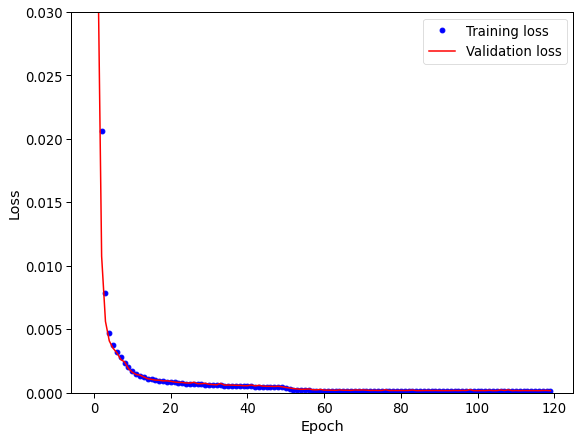

In [30]:
# Plots 'history'
fig, (ax2) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax2 =sns.set_context("paper", font_scale=1.5, rc=paper_rc)

history_dict=history.history
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='training loss val')
plt.ylim(0,0.03)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'])

ax2_name = 'Loss_vs_Val_loss_for_nn_sequential' + '.tiff'
plt.savefig(ax2_name, dpi=300);

plt.show()

In [21]:
# R square score to check the model accurary
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.999
The R2 score on the Test set is:	0.999


In [39]:
Y_pred = model.predict(x_test)
Y_pred = Y_pred[:,0]
y_test = y_test[:,0]

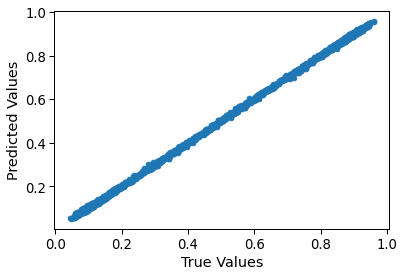

In [40]:
fig, (ax1) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax1 =sns.set_context("paper", font_scale=1.5, rc=paper_rc)

plt.scatter(y_test, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

ax1_name = 'True_vs_Predicted_value_for_nn_sequential' + '.tiff'
plt.savefig(ax1_name, dpi=300);

plt.show()

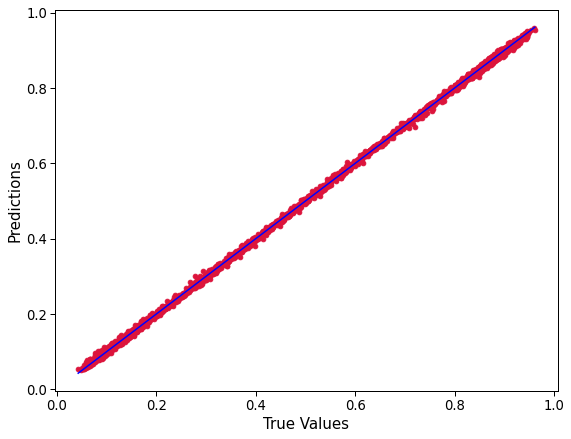

In [48]:
fig, (ax1) = plt.subplots(figsize=(9,7))

paper_rc = {'lines.linewidth':1.5}
ax1 =sns.set_context("paper", font_scale=1.5, rc=paper_rc)
plt.scatter(y_test, Y_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(Y_pred), max(y_test))
p2 = min(min(Y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

ax1_name = 'True_vs_Predicted_value_for_nn_sequential' + '.tiff'
plt.savefig(ax1_name, dpi=300);

plt.show()